In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing data

In [ ]:
import os
train_dir = '/content/drive/MyDrive/Defense/Dataset/Lung Disease Dataset/train'
test_dir = '/content/drive/MyDrive/Defense/Dataset/Lung Disease Dataset/test'
val_dir = '/content/drive/MyDrive/Defense/Dataset/Lung Disease Dataset/val'
model_dir = '/content/'

IMAGE_SIZE = 64
num_classes = 5

##train

In [ ]:
import cv2
from tqdm.notebook import tqdm_notebook as tqdm

X_train = []
y_train = []
true_label = {}
os.chdir(train_dir)
for label, path in enumerate(os.listdir()):
  path = '/'+ path + '/'
  for i in tqdm(os.listdir(train_dir + path)):
    true_label[label] = list(path.split('/'))[-2]
    img_path = train_dir + path + i
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X_train.append(img)
    y_train.append(true_label[label])

  0%|          | 0/1220 [00:00<?, ?it/s]

  0%|          | 0/1220 [00:00<?, ?it/s]

  0%|          | 0/1204 [00:00<?, ?it/s]

  0%|          | 0/1205 [00:00<?, ?it/s]

  0%|          | 0/1218 [00:00<?, ?it/s]

##test

In [ ]:
import cv2
from tqdm.notebook import tqdm_notebook as tqdm

X_test = []
y_test = []
true_label = {}
os.chdir(test_dir)
for label, path in enumerate(os.listdir()):
  path = '/' + path + '/'
  for i in tqdm(os.listdir(test_dir + path)):
    true_label[label] = list(path.split('/'))[-2]
    img_path = test_dir + path + i
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X_test.append(img)
    y_test.append(true_label[label])

  0%|          | 0/404 [00:00<?, ?it/s]

  0%|          | 0/408 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/407 [00:00<?, ?it/s]

##validation

In [ ]:
import cv2
from tqdm.notebook import tqdm_notebook as tqdm

X_val = []
y_val = []
true_label = {}
os.chdir(val_dir)
for label, path in enumerate(os.listdir()):
  path = '/'+ path + '/'
  for i in tqdm(os.listdir(val_dir + path)):
    true_label[label] = list(path.split('/'))[-2]
    img_path = val_dir + path + i
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X_val.append(img)
    y_val.append(true_label[label])

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

##preprocessing

In [ ]:
from sklearn import preprocessing
#from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import numpy as np


le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
y_val = np.array(y_val)
X_val = np.array(X_val)

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("X_val Shape: ", X_val.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)
print("y_val Shape: ", y_val.shape)

X_train Shape:  (6067, 64, 64, 3)
X_test Shape:  (2025, 64, 64, 3)
X_val Shape:  (2016, 64, 64, 3)
y_train Shape:  (6067, 5)
y_test Shape:  (2025, 5)
y_val Shape:  (2016, 5)


# building model

In [ ]:
from tensorflow.keras.applications import DenseNet201

def build_densenet():
    dense201 = DenseNet201(weights = 'imagenet',
                    include_top = False,
                    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

    for layer in dense201.layers:
      layer.trainable = False

    for (i,layer) in enumerate(dense201.layers):
      print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

    return dense201

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.regularizers import l1

def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = Flatten()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

model = build_densenet()

annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint(model_dir + 'rice5_mobilenetv3small.hdf5', verbose=1, save_best_only=True)

74836368/74836368 [==============================] - 1s 0us/step
0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 BatchNormalization False
8 Activation False
9 Conv2D False
10 BatchNormalization False
11 Activation False
12 Conv2D False
13 Concatenate False
14 BatchNormalization False
15 Activation False
16 Conv2D False
17 BatchNormalization False
18 Activation False
19 Conv2D False
20 Concatenate False
21 BatchNormalization False
22 Activation False
23 Conv2D False
24 BatchNormalization False
25 Activation False
26 Conv2D False
27 Concatenate False
28 BatchNormalization False
29 Activation False
30 Conv2D False
31 BatchNormalization False
32 Activation False
33 Conv2D False
34 Concatenate False
35 BatchNormalization False
36 Activation False
37 Conv2D False
38 BatchNormalization False
39 Activation False
40 Conv2D False
41 Concatenate False
42 BatchNormalization False
43 Activation False


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

FC_Head = lw(model, num_classes)
model = Model(inputs = model.input, outputs = FC_Head)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)            0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 32, 32, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1/conv[0][0]']      

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

optimizer = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# training

In [ ]:
EPOCHS = 70

In [ ]:
history = model.fit(X_train, y_train,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val,y_val))

Epoch 1/70
190/190 [==============================] - ETA: 0s - loss: 0.7553 - accuracy: 0.6938
Epoch 1: val_loss improved from inf to 0.64705, saving model to /content/rice5_mobilenetv3small.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


190/190 [==============================] - 206s 994ms/step - loss: 0.7553 - accuracy: 0.6938 - val_loss: 0.6471 - val_accuracy: 0.7560 - lr: 0.0050
Epoch 2/70
190/190 [==============================] - ETA: 0s - loss: 0.5067 - accuracy: 0.7907
Epoch 2: val_loss improved from 0.64705 to 0.60066, saving model to /content/rice5_mobilenetv3small.hdf5
190/190 [==============================] - 177s 933ms/step - loss: 0.5067 - accuracy: 0.7907 - val_loss: 0.6007 - val_accuracy: 0.7783 - lr: 0.0050
Epoch 3/70
190/190 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.8060
Epoch 3: val_loss improved from 0.60066 to 0.58355, saving model to /content/rice5_mobilenetv3small.hdf5
190/190 [==============================] - 182s 958ms/step - loss: 0.4697 - accuracy: 0.8060 - val_loss: 0.5835 - val_accuracy: 0.7763 - lr: 0.0050
Epoch 4/70
190/190 [==============================] - ETA: 0s - loss: 0.4058 - accuracy: 0.8299
Epoch 4: val_loss improved from 0.58355 to 0.49314, saving

# result

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

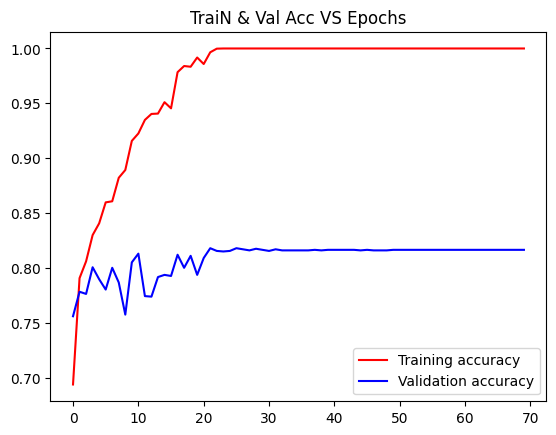

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show();

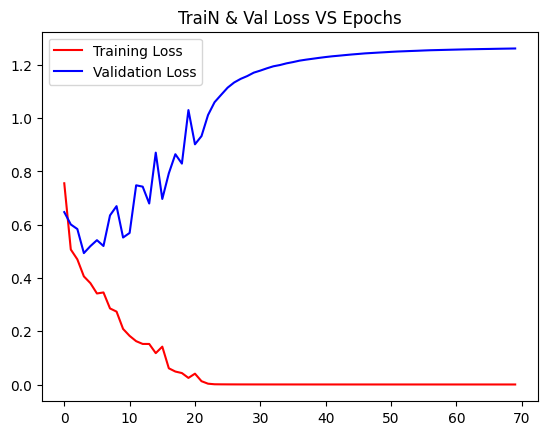

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show();

In [ ]:
model.load_weights(model_dir + 'rice5_mobilenetv3small.hdf5')

In [ ]:
score = model.evaluate(X_test, y_test ,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

64/64 [==============================] - 53s 700ms/step - loss: 0.4590 - accuracy: 0.7985
Test Loss: 0.45901188254356384
Test accuracy: 79.85185384750366


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
rounded_labels_1 = np.argmax(pred, axis=1)
rounded_labels_2 = np.argmax(y_test, axis=1)
rounded_labels_1[1]
rounded_labels_2[1]
accuracy_score(rounded_labels_2,rounded_labels_1)
# print(confusion_matrix(rounded_labels_2,rounded_labels_1))
print(classification_report(rounded_labels_2,rounded_labels_1))

64/64 [==============================] - 43s 587ms/step
              precision    recall  f1-score   support

           0       0.59      0.76      0.67       403
           1       0.90      0.93      0.91       407
           2       0.89      0.88      0.89       404
           3       0.95      0.93      0.94       408
           4       0.68      0.50      0.57       403

    accuracy                           0.80      2025
   macro avg       0.80      0.80      0.80      2025
weighted avg       0.80      0.80      0.80      2025



{0: 'Viral Pneumonia', 1: 'Tuberculosis', 2: 'Bacterial Pneumonia', 3: 'Normal', 4: 'COVID19'}


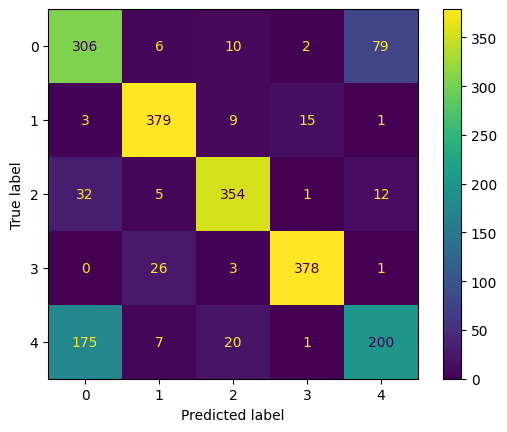

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(rounded_labels_2, rounded_labels_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(true_label)
disp.plot()
plt.show()